# Machine Leanring Assignment 3: Tweet Sentiment Classifcation

In [1]:
# Imports
import pandas as pd
import numpy as np
import ast
from scipy.sparse import csr_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import DictVectorizer

from collections import Counter
from random import random

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier

# TRAINING PHASE 

## Read Train Data

In [2]:
def convertToDictionary(data):
    i = 0
    for tweet in data["tweet"]:
        tweet_list = ast.literal_eval(tweet)
        tweet_kv = [(str(tup[0]), tup[1]) for tup in tweet_list]
        tweet_dict = dict(tweet_kv)
        data.at[i, "tweet"] = tweet_dict
        i += 1
        
    return data

def convertToList(data):
    i = 0
    for tweet in data["tweet"]:
        tweet_list = ast.literal_eval(tweet)
        data.at[i, "tweet"] = tweet_list
        i += 1
        
    return data

In [3]:
# LOAD TRAIN DATA
# 1. TFIDF
f_train_data = pd.read_csv("data/data/train_tfidf.csv")

# Convert each tweet into a dictionary for processing
f_train_data = convertToDictionary(f_train_data)

# 2. GloVe
g_train_data = pd.read_csv("data/data/train_glove.csv")
g_train_data = convertToList(g_train_data)

# 3. Count
c_train_data = pd.read_csv("data/data/train_count.csv")
c_train_data = convertToDictionary(c_train_data)

## Visualize Data

The prior probability of positive is 0.39212
The prior probability of negative is 0.40735
The prior probability of neutral is 0.20052


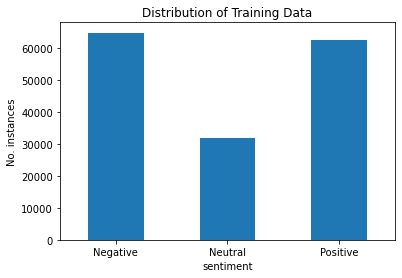

In [30]:
# Plot distribution for training dataset.
ax = f_train_data.groupby('sentiment').count()["tweet"].plot(kind='bar', title='Distribution of Training Data',
                                                             ylabel='No. instances', legend=False)
ax.set_xticklabels(["Negative","Neutral","Positive"], rotation=0)

prior_pos_t = Counter(y_train_f)['pos'] / (Counter(y_train_f)['pos'] + Counter(y_train_f)['neg'] + Counter(y_train_f)['neu'])
prior_neg_t = Counter(y_train_f)['neg'] / (Counter(y_train_f)['pos'] + Counter(y_train_f)['neg'] + Counter(y_train_f)['neu'])
prior_neu_t = Counter(y_train_f)['neu'] / (Counter(y_train_f)['pos'] + Counter(y_train_f)['neg'] + Counter(y_train_f)['neu'])
print("The prior probability of positive is", round(prior_pos_t,5))
print("The prior probability of negative is", round(prior_neg_t,5))
print("The prior probability of neutral is", round(prior_neu_t,5))


## Process Training Input

In [25]:
# Process Data
v = DictVectorizer()

X_train_f = v.fit_transform(f_train_data["tweet"])
y_train_f = f_train_data["sentiment"]

X_train_g = g_train_data["tweet"].to_list()
y_train_g = g_train_data["sentiment"]

X_train_c = v.fit_transform(c_train_data["tweet"])
y_train_c = c_train_data["sentiment"]

## Train Models
Models were trained on each of the three given feature representations

### 1 . TFIDF

#### Logistic Regression

In [291]:
lr_f = LogisticRegression().fit(X_train_f, y_train_f)

C:\Users\dcole\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Multinomial Naive Bayes

In [292]:
mnb_f = MultinomialNB().fit(X_train_f,y_train_f)

#### Multi-Layer Perceptron

In [315]:
# Was using (15,) hidden layers for excellent performance
mlp_f = MLPClassifier(alpha=1e-5,
                     hidden_layer_sizes=(3,), random_state=1)

mlp_f.fit(X_train_f, y_train_f)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(3,), random_state=1)

### 2. GloVe

#### Logistic Regression

In [297]:
lr_g = LogisticRegression().fit(X_train_g, y_train_g)

C:\Users\dcole\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Multi-Layer Perceptron

In [ ]:
mlp_g = MLPClassifier(alpha=1e-5,
                     hidden_layer_sizes=(50,), random_state=1)

mlp_g.fit(X_train_g, y_train_g)

#### Naive Bayes
Don't use Naive Baynes due to conditional indepednence assumption.
These features are inherently related as all 100 represent the same word

### 3. Count

#### Logistic Regression

In [298]:
lr_c = LogisticRegression().fit(X_train_c, y_train_c)

C:\Users\dcole\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Multinomial Naive Bayes

In [299]:
mnb_c = MultinomialNB().fit(X_train_c,y_train_c)

#### Multi-Layer Perceptron

In [ ]:
mlp_c = MLPClassifier(alpha=1e-5,
                     hidden_layer_sizes=(5,), random_state=1)

mlp_c.fit(X_train_c, y_train_c)

# DEVELOPMENT PHASE

## Read Dev Data

In [6]:
# LOAD DEV DATA
# ********************** CHANGE TO SAME FOLDER ********************************************
# 1. TFIDF
f_dev_data = pd.read_csv("data/data/dev_tfidf.csv")
f_dev_data = convertToDictionary(f_dev_data)

# 2. GloVe
g_dev_data = pd.read_csv("data/data/dev_glove.csv")
g_dev_data = convertToList(g_dev_data)

# 3. Count
c_dev_data = pd.read_csv("data/data/dev_count.csv")
c_dev_data = convertToDictionary(c_dev_data)

The prior probability of positive is 0.39767
The prior probability of negative is 0.40666
The prior probability of neutral is 0.19567


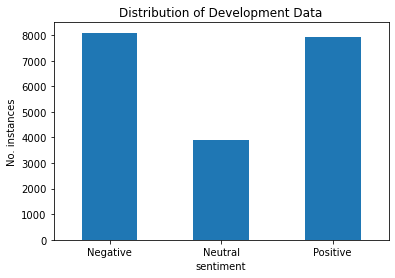

In [31]:
# Plot distribution for training dataset.
ax_dev = f_dev_data.groupby('sentiment').count()['tweet'].plot(kind='bar', title='Distribution of Development Data',
                                                               ylabel='No. instances', legend=False)
ax_dev.set_xticklabels(["Negative","Neutral","Positive"], rotation=0)

print("The prior probability of positive is", round(prior_pos,5))
print("The prior probability of negative is", round(prior_neg,5))
print("The prior probability of neutral is", round(prior_neu,5))

## Process Dev Input

In [26]:
# Process Data
X_dev_f = v.transform(f_dev_data["tweet"])
y_dev_f = f_dev_data["sentiment"]

X_dev_g = g_dev_data["tweet"].to_list()
y_dev_g = g_dev_data["sentiment"]

X_dev_c = v.transform(c_dev_data["tweet"])
y_dev_c = c_dev_data["sentiment"]

## Predictions - DEV dataset

In [316]:
# MODELS - DEV
# tfidf
lr_f.predict(X_dev_f)

mnb_f.predict(X_dev_f)

mlp_f.predict(X_dev_f)

array(['neg', 'neg', 'pos', ..., 'neu', 'neg', 'neg'], dtype='<U3')

In [300]:
# glove
lr_g.predict(X_dev_g)

# Don't use Naive Baynes due to conditional indepednence assumption.
# These features are inherently related as all 100 represent the same word
# mnb_dev_g = MultinomialNB().fit(X_dev_g,y_dev_g)
# mnb_dev_g.predict(X_dev_g)

mlp_g.predict(X_dev_g)

NameError: name 'mlp_g' is not defined

In [301]:
# count
lr_c.predict(X_dev_c)

mnb_c.predict(X_dev_c)

mlp_c.predict(X_dev_c)

NameError: name 'mlp_c' is not defined

## Evaluation - DEV dataset

In [317]:
print("Tfidf")
print("Logistic Regression Accuracy:\t" + str(lr_f.score(X_dev_f, y_dev_f)))
print("Naive Bayes Accuracy:\t" + str(mnb_f.score(X_dev_f, y_dev_f)))
print("Multi-Layer Perceptron:\t" + str(mlp_f.score(X_dev_f, y_dev_f)))

print("GloVe")
print("Logistic Regression Accuracy:\t" + str(lr_g.score(X_dev_g, y_dev_g)))
# print("Multi-Layer Perceptron:\t" + str(mlp_g.score(X_dev_g, y_dev_g)))

print("Count")
print("Logistic Regression Accuracy:\t" + str(lr_c.score(X_dev_c, y_dev_c)))
print("Naive Bayes Accuracy:\t" + str(mnb_c.score(X_dev_c, y_dev_c)))
# print("Multi-Layer Perceptron:\t" + str(mlp_c.score(X_dev_c, y_dev_c)))

Tfidf
Logistic Regression Accuracy:	0.7419873405003516
Naive Bayes Accuracy:	0.7256103687330453
Multi-Layer Perceptron:	0.7368130211996383
GloVe
Logistic Regression Accuracy:	0.6789410228071938
Count
Logistic Regression Accuracy:	0.7406812016477444
Naive Bayes Accuracy:	0.7307846880337586


#### Observations:
1. Mutli-Layer Perceptron performing the best
2. GloVe embeddings not performing well on current models

## Baseline Evaluation
Check each model performs better than the naive baseline model. One-R in this case

In [153]:
# One-R implementation
import random

def weight_random(y_dev):
    error = 0    

    correct = 0
    incorrect = 0
    for label in y_dev:
        prediction = random.choice(y_dev)

#         print(prediction, label)
        if(prediction == label):
            correct += 1
        else:
            incorrect += 1

    error = incorrect / len(y_dev)
 
    return error, correct, incorrect

count_pos = Counter(y_dev_f)['pos'] 
count_neg = Counter(y_dev_f)['neg'] 
count_neu = Counter(y_dev_f)['neu']

In [154]:
error, correct, incorrect = weight_random(y_dev_f)
print("There are",count_pos,"positive, ", count_neg,"negative, and",count_neu, "neutral dev instances")
print(correct, "correct predicitons, ",incorrect,"incorrect predictions" )
print("The weighted random baseline's error is:", round(error,10))

There are 7916 positive,  8095 negative, and 3895 neutral dev instances
7107 correct predicitons,  12799 incorrect predictions
The prior probability of positive is 0.39767
The prior probability of negative is 0.40666
The prior probability of neutral is 0.19567
The weighted random baseline's error is: 0.6429719683


In [155]:
error, correct, incorrect = weight_random(y_dev_g)
print("There are",count_pos,"positive, ", count_neg,"negative, and",count_neu, "neutral dev instances")
print(correct, "correct predicitons, ",incorrect,"incorrect predictions" )
print("The weighted random baseline's error is:", round(error,10))

There are 7916 positive,  8095 negative, and 3895 neutral dev instances
7068 correct predicitons,  12838 incorrect predictions
The prior probability of positive is 0.39767
The prior probability of negative is 0.40666
The prior probability of neutral is 0.19567
The weighted random baseline's error is: 0.6449311765


In [156]:
error, correct, incorrect = weight_random(y_dev_c)
print("There are",count_pos,"positive, ", count_neg,"negative, and",count_neu, "neutral dev instances")
print(correct, "correct predicitons, ",incorrect,"incorrect predictions" )
print("The weighted random baseline's error is:", round(error,10))

There are 7916 positive,  8095 negative, and 3895 neutral dev instances
7229 correct predicitons,  12677 incorrect predictions
The prior probability of positive is 0.39767
The prior probability of negative is 0.40666
The prior probability of neutral is 0.19567
The weighted random baseline's error is: 0.6368431629


In [27]:
from random import random
# Determine class distirbutions
prior_pos = Counter(y_dev_f)['pos'] / (Counter(y_dev_f)['pos'] + Counter(y_dev_f)['neg'] + Counter(y_dev_f)['neu'])
prior_neg = Counter(y_dev_f)['neg'] / (Counter(y_dev_f)['pos'] + Counter(y_dev_f)['neg'] + Counter(y_dev_f)['neu'])
prior_neu = Counter(y_dev_f)['neu'] / (Counter(y_dev_f)['pos'] + Counter(y_dev_f)['neg'] + Counter(y_dev_f)['neu'])

def weight_random2(y_dev,prior_pos,prior_neg):
    pos_boundary = prior_pos
    neg_boundary = prior_pos + prior_neg
    
    error = 0    
    correct = 0
    incorrect = 0
    for label in y_dev:
        prediction = random()
        if(prediction <= pos_boundary):
            prediction = 'pos'  
        elif(pos_boundary < prediction <= neg_boundary):
            prediction = 'neg'
        else:
            prediction = 'neu'
        if(prediction == label):
            correct += 1
        else:
            incorrect += 1

    error = incorrect / len(y_dev)
 
    return error, correct, incorrect

In [158]:
error, correct, incorrect = weight_random2(y_dev_f, prior_pos, prior_neg)
print("There are",count_pos,"positive, ", count_neg,"negative, and",count_neu, "neutral dev instances")
print(correct, "correct predicitons, ",incorrect,"incorrect predictions" )
print("The prior probability of positive is", round(prior_pos,5))
print("The prior probability of negative is", round(prior_neg,5))
print("The prior probability of neutral is", round(prior_neu,5))
print("The weighted random baseline's error is:", round(error,10))

There are 7916 positive,  8095 negative, and 3895 neutral dev instances
7313 correct predicitons,  12593 incorrect predictions
The prior probability of positive is 0.39767
The prior probability of negative is 0.40666
The prior probability of neutral is 0.19567
The weighted random baseline's error is: 0.6326233296


In [113]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="stratified")
dummy_clf.fit(X_dev_f, y_dev_f)
dummy_clf.score(X_dev_f, y_dev_f)

0.3632573093539636

## Selecting Best Model

The analysis of the dev dataset suggested that the Multi-Layer Perceptron was the most suitable model for this classification task, hence we select this model the train with the training dataset.
Feature selection best option was ...

## Tuning Selected Model
Optimise parameters for best performance,
Optimise features for best performance

# TESTING PHASE 

## Read Test Data

## Process Test Input
Prepare the features which performed the best during dev evaluation 

## Test Model
Test selected model against the test instances

In [ ]:
# MODELS - TEST